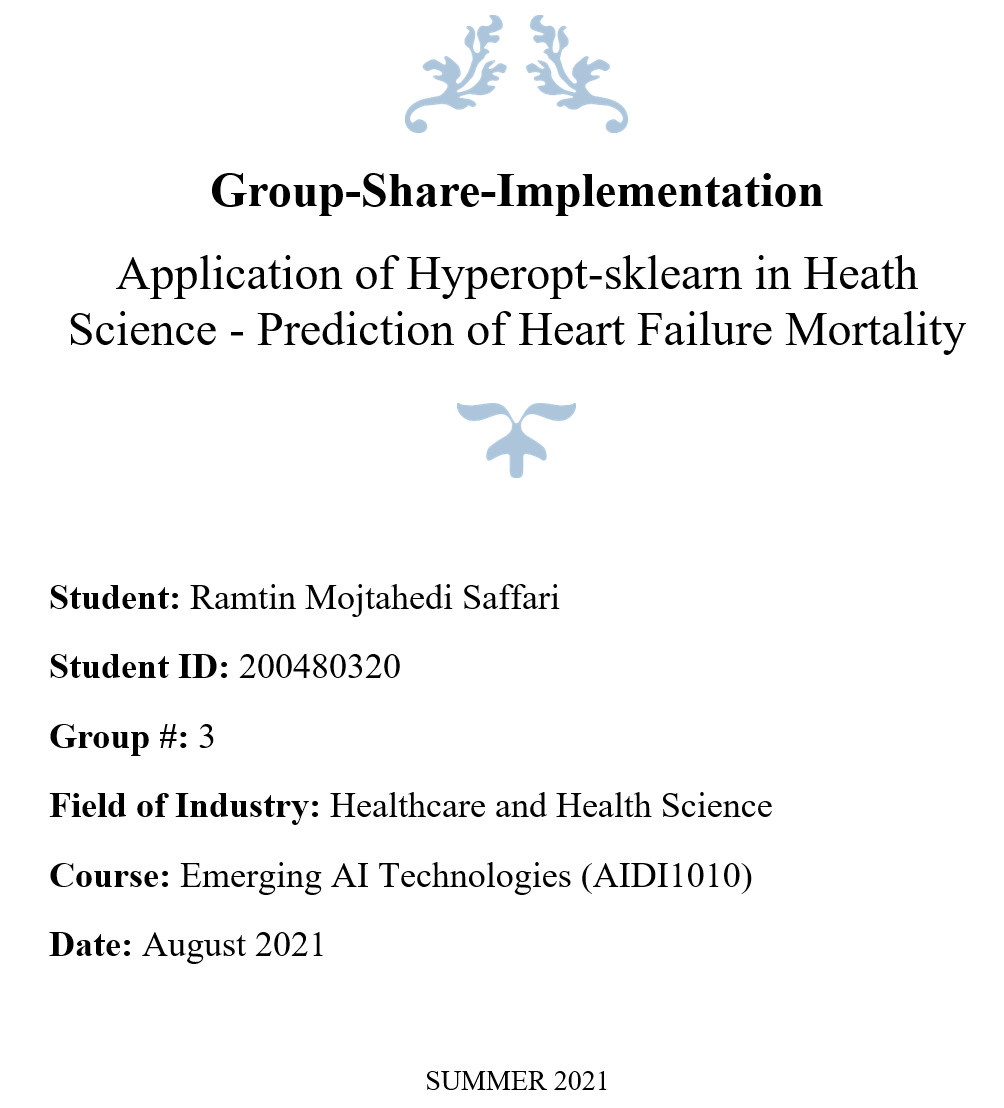




# **Description of the selected AutoML - HyperOpt-Sklearn**

**HyperOpt-Sklearn**

In 2014, HyperOpt-Sklearn was introduced as a top modeul over the HyperOpt [1]. This module was designed to work with different components of the scikit-learn suite. HyperOpt-Sklearn was created to optmize machine learning pipelines, addressing the phases of data transformation, selecting machine learning models and hyperparameter optimization. This module merges the advantages of HyperOpt with the usability and flexibility of the scikit-learn framewors. Also, it supports both classification and regression tasks. The AUTOML pipeline s showns in the following image [2]. 

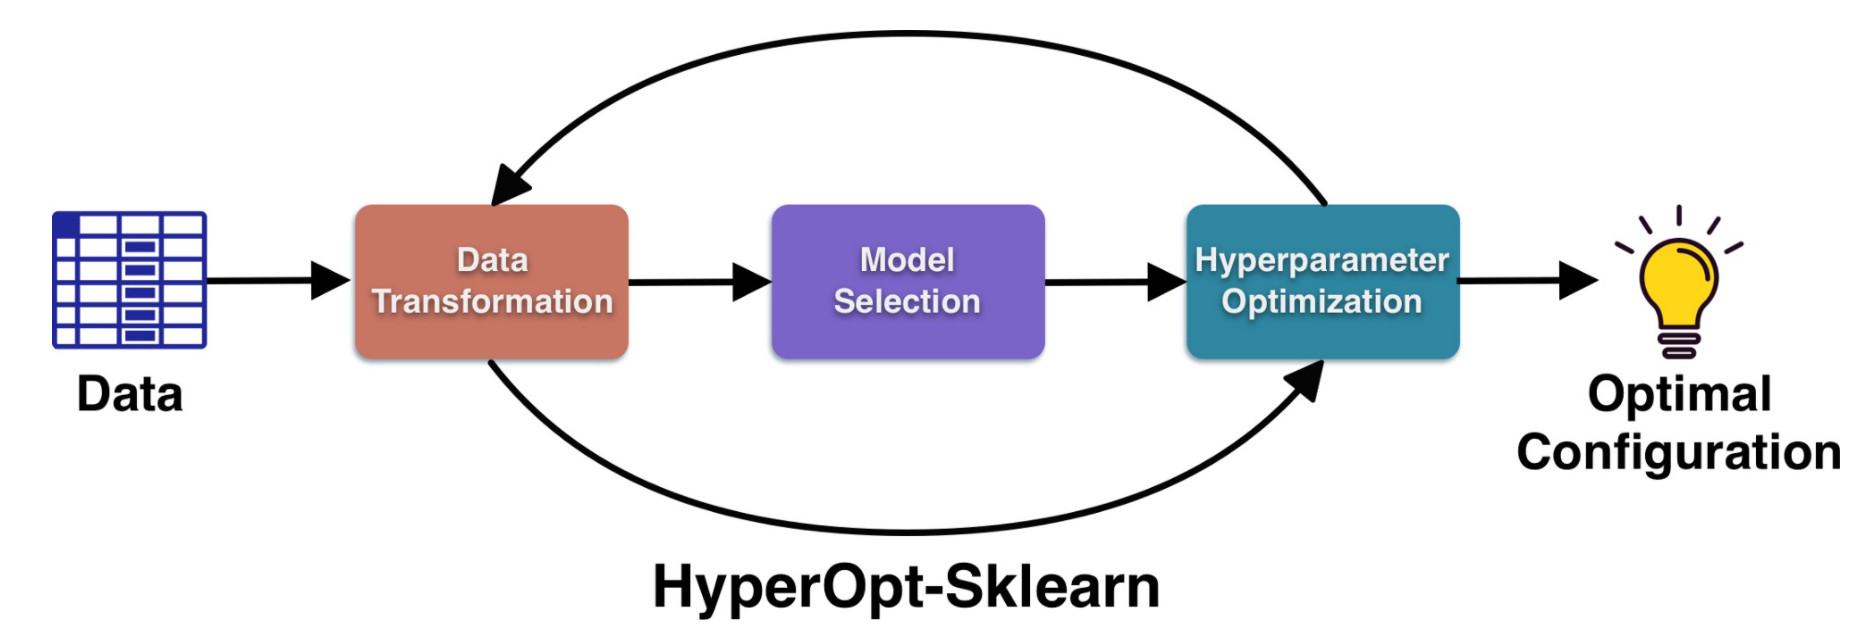

As shown above, the main parameetrs are as follows:
* The type of preprocessor
* The machine learning model (i.e. classifier or regressor)
* The optimizer
* The number of evaluations and the time per pipeline can also be specified

In over all this modeul has the following specifcations:

* A software that provides automated algorithm configuration of the Scikit-learn ML library.
* It  is built on top of HyperOpt and is designed to work with various components of the scikit-learn suite.
* It unifies the advantages of HyperOpt with the usability and flexibility of the scikit-learn framework.
* It’s main objectives include optimizing ML pipelines, addressing specifically the phases of data transformation, model selection and hyperparameter optimization.
* It uses HyperOpt to describe a search space over possible configurations of scikit-learn components, including preprocessing, classification, and regression modules.
* It allows for the automatic search of data preparation methods, machine learning algorithms, and model hyperparameters for classification and regression tasks.
* HyperOpt sklearn automatically discovers top-performing models for classification tasks and regression tasks.
* The search process for the best model is defined by creating and configuring an instance of the ‘HyperoptEstimator’ class.


Specifications of this modeul are as follows.

**The different types of preprocessors supported by HyperOpt Sklearn are:**
* PCA
* TfidfVectorizer
* StandardScaler
* MinMaxScaler
* Normalizer
* OneHotEncoder

**The classifiers supported by HyperOpt Sklearn are:**
* SVC
* LinearSVC 
* KNeighboursclassifier
* RandomForestClassifier
* ExtraTreeClassifier
* SGDClassifier
* MultinomialNB
* BernoulliRBM
* ColumnKMeans


**The different types of regressors supported by HyperOpt Sklearn are:**
* SVR
* LinearSVR
* KNNRegression
* AdaBoostRegression
* GradientBoostingRegression
* RandomForestRegression
* ExtraTreesRegression
* SGDRegression
* XgBoostRegression

# **Heart Failure (HF)**

## **Problem Statement**

Cardiovascular disease is among ever-growing challenges and disease over the world and Canada. In 2019, about 200 patients out of every 100,000 people were died due to the cardiovascualr diease [3]. Costs associated with cardiovascular disease, including physician services, hospitalizations, lost wages and decreased productivity, are estimated to be more than $22.2 billion per year. Heart failure (HF) is one of the major cardiovascular diease that simply happenes when the heart muscle doesn't pump as much blood as your body needs [4]. In this project, we are aiming to onduct an in-depth analysis on the heart failure dataset collected by University of California Irvine to obtain critical observations which can be used for inference [5]. Using machine leagning algorithm with the help of Hyperopt-Sklearn and based on the various biological and physical parameters of the body; we find the best model that can predicts herat failure outcome compared to the provided ground truth infromation. 


The following image, shows what happens in our heart when HF happnes compared to a healthy heart.

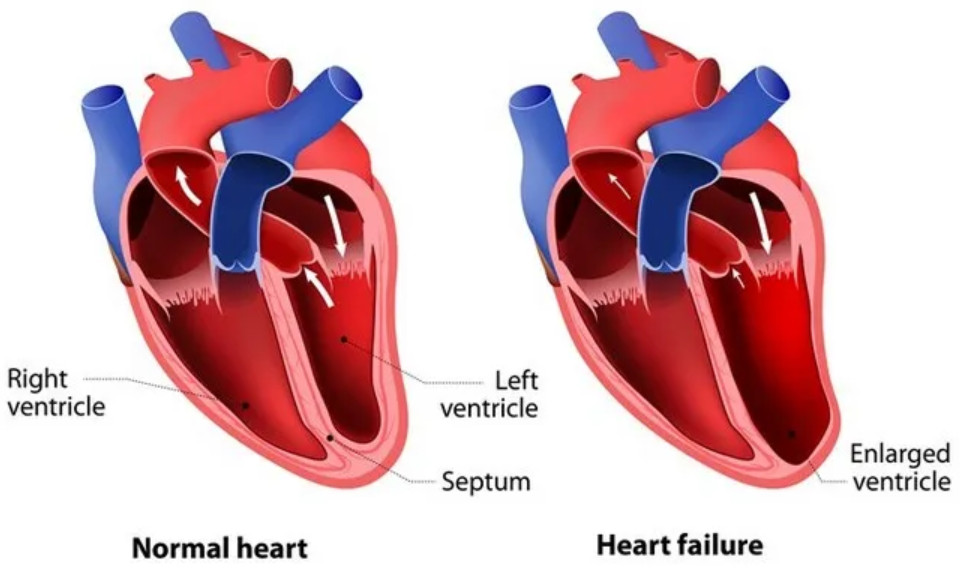

The involved factors in heart failure are shown in the following image [6]:

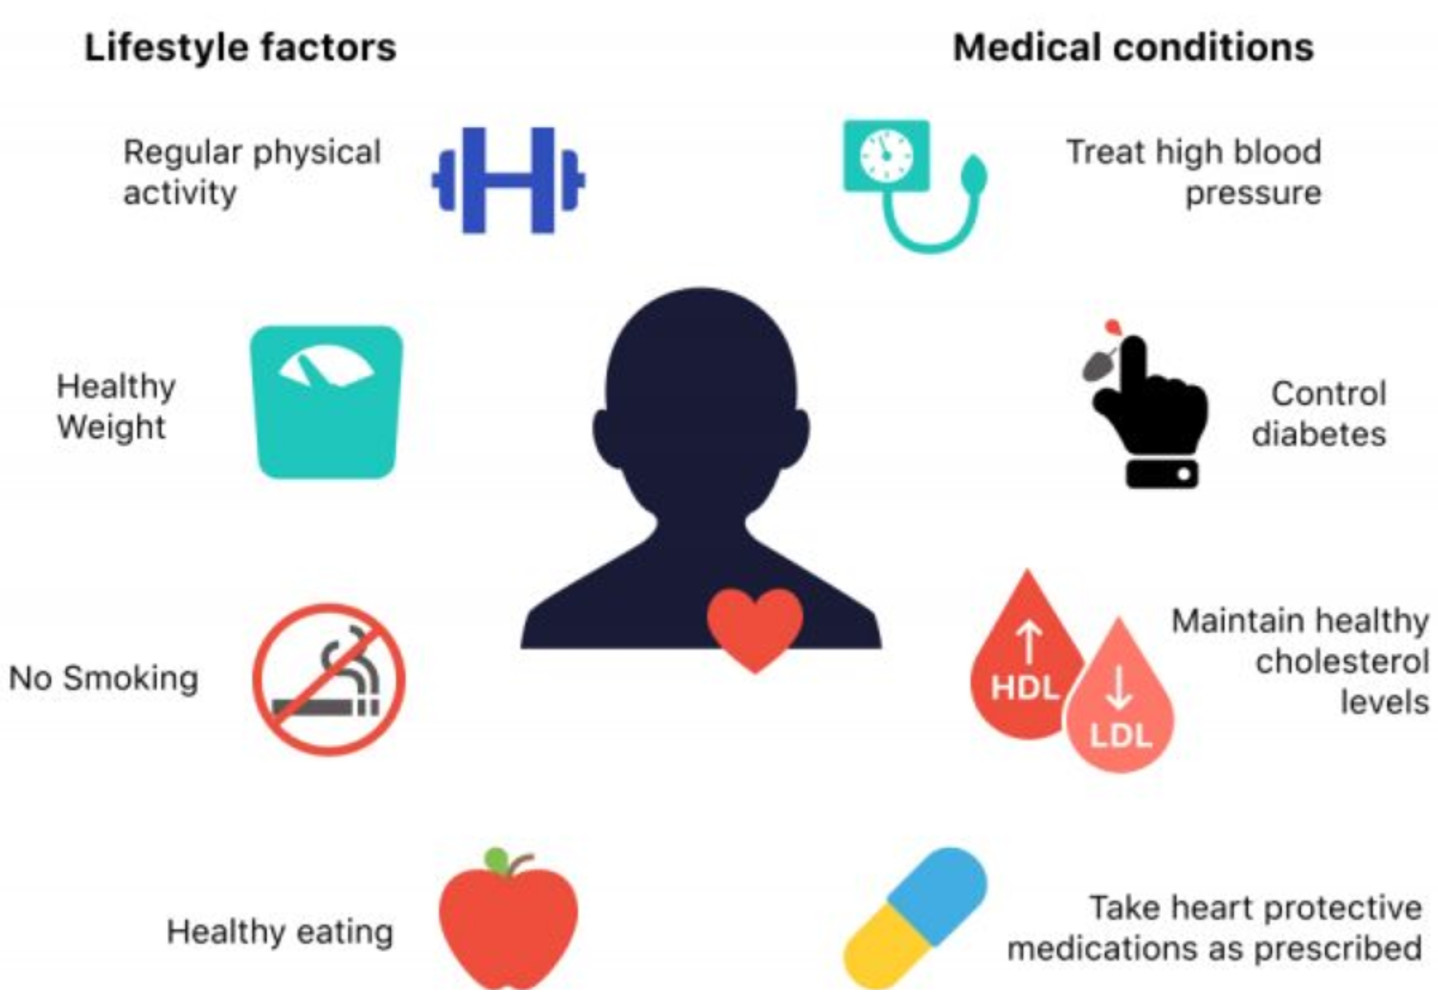

# **Dataset Specifications**

The datset that was used is collected by reference [5]. The dataset consists of 12 attributes and 299 instances, with no missing values. The following are details of the data specifications.

Binary Features:

    Anaemia (Decrease of Red BLood Cells or Hemoglobin)
    High blood pressure (Hypertension)
    Diabetes (If the patient has diabetes)
    Smoking (If the patient smokes)
    Sex (Man or Women)

Continuous Features:

    age
    Creatinine phosphokinase CPK (Level of the CPK enzyme in the blood in mcg/L)
    Ejection fraction (Percentage of blood leaving the heart at each contraction)
    Serum Sodium (Level of Sodium in the blood in mEq/L)
    Serum Creatinine (Level of Creatininie in the blood in mg/dL)
    Platelets (Platelets in the blood in kiloplatelets/mL)
    Time (Follow-up period in Days)

Target Class:

    Death Event (If the patient died during follow-up period)

An overview of the features and target value is shown as the following table.

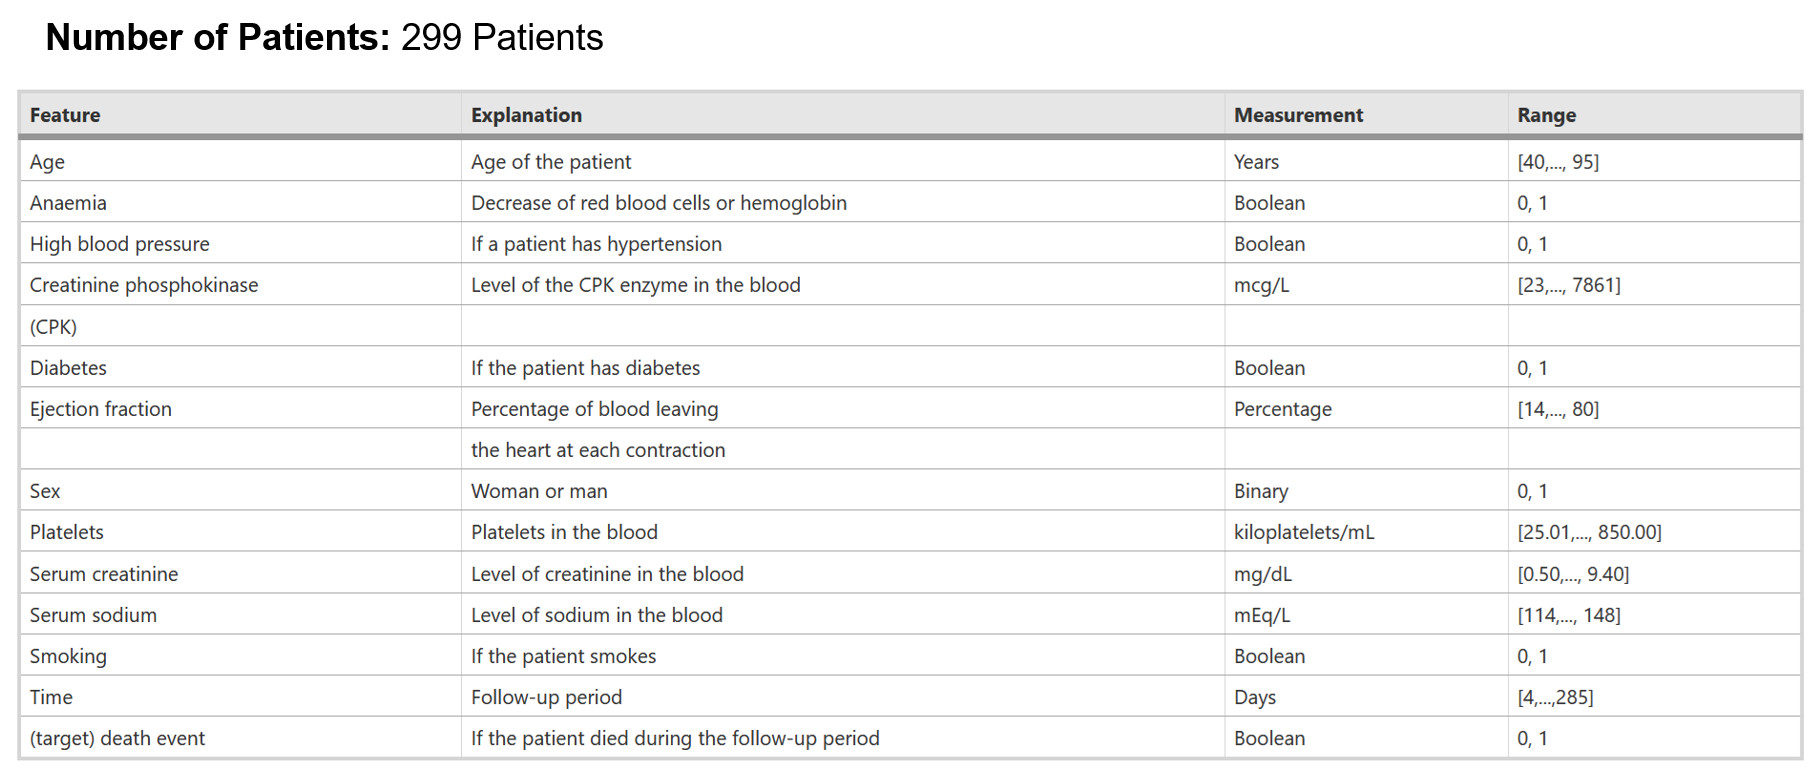

# **Python Code**

**Upload Dataset**

In [1]:
#Saving the dataset to the notebook
from google.colab import files
uploaded = files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset.csv


**Import Libraries, Dataset, and Packages**

In [2]:
#Import libraries and packages
import pandas as pd
import csv
import re
from pandas import read_csv
import datetime
import numpy as np
import statsmodels.api as sm
import statsmodels.stats.api as sms
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE, RFECV
from sklearn.feature_selection import SelectFromModel
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


***Exploratory Data Analysis***

In [3]:
# Visualizing the dataset table
pd.set_option('display.width',1000)
pd.set_option('display.max_columns',300)
pd.set_option('display.max_rows',1000)
df = pd.read_csv("heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
"""Check the data types of the feature columns and find 
   is there any missing values present in the columns"""
print(df .info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


In [5]:
# Checking for null values
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [6]:
# Display Number of Rows & Columns 
df.shape

(299, 13)

In [7]:
# Display a description of the dataset
display(df.describe())

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


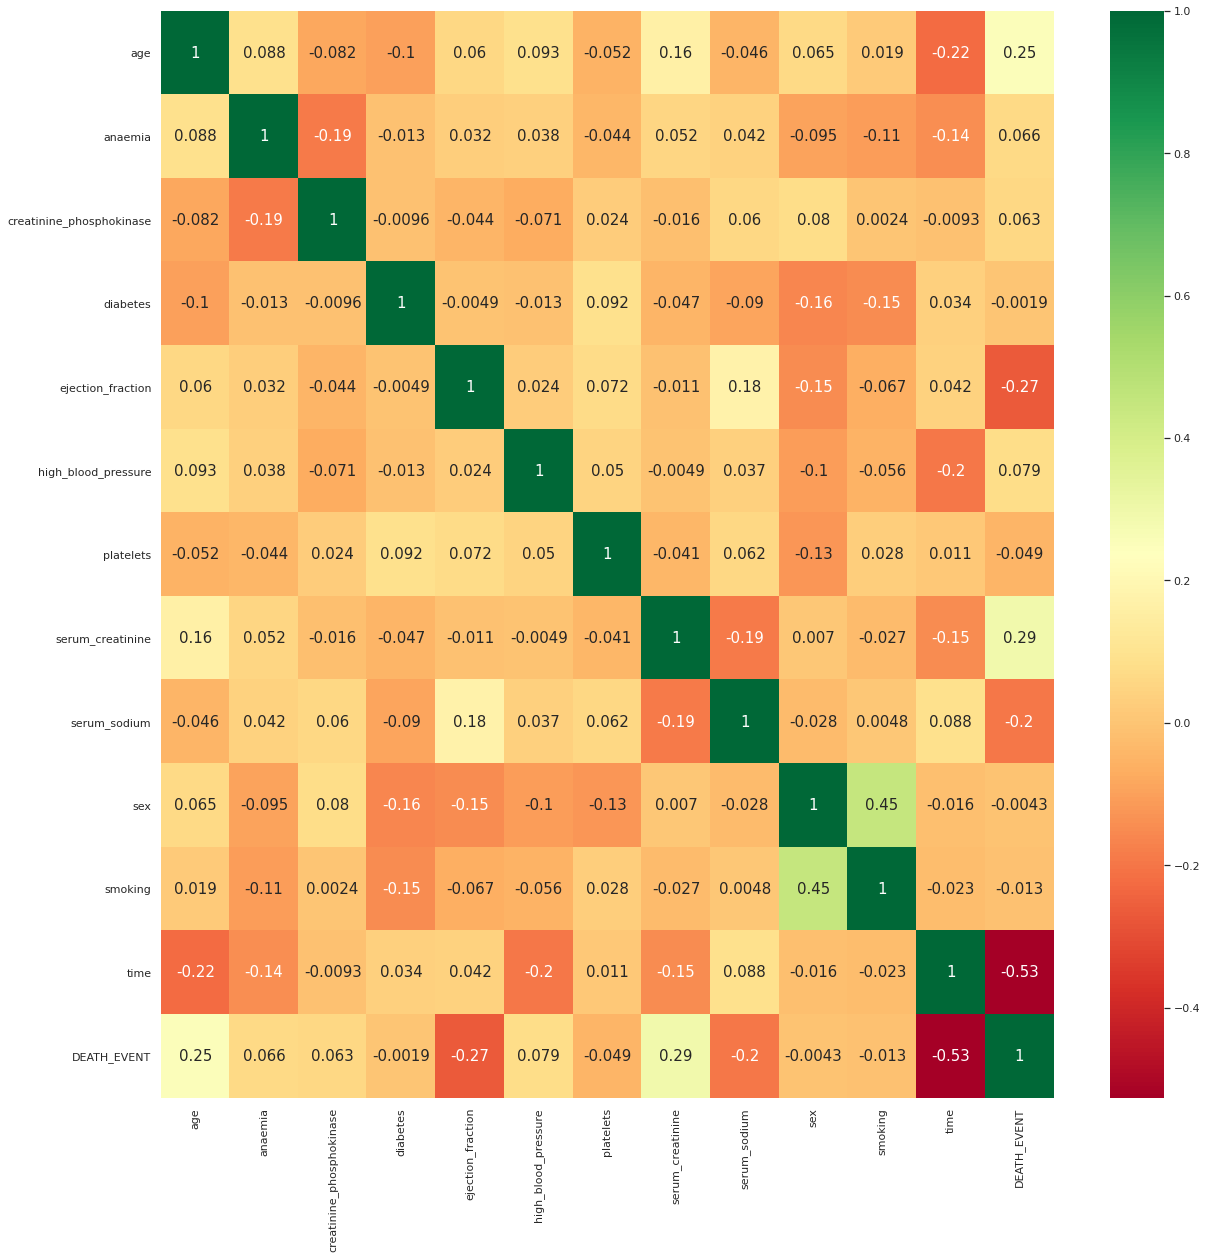

In [38]:
""" The correlation heat map shows us that which feature are more related
    to the prediction of the heart attacks. So that we can use these features 
    for creating our prediction model"""
# As it is showsn, there is no high-correlation parameters (more than 0.75)
corr_matrix = df.corr()
top_corr_feature = corr_matrix.index
plt.figure(figsize=(20, 20))
sns.heatmap(df[top_corr_feature].corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

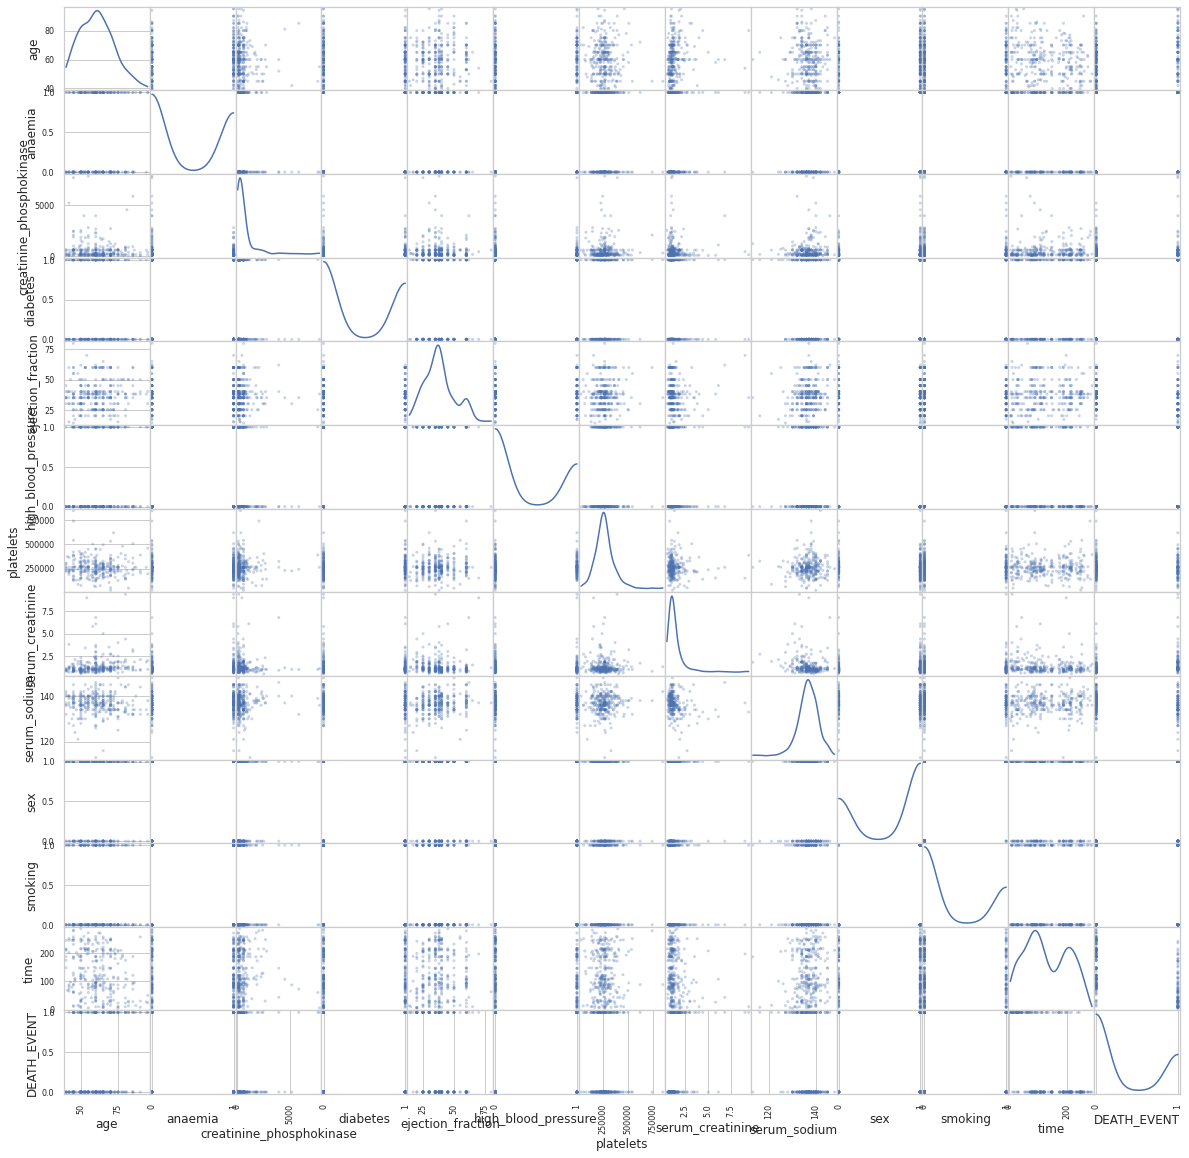

In [9]:
#Scatter plot of features
from pandas.plotting import scatter_matrix
scatter_matrix(df, alpha = 0.3, figsize = (20,20), diagonal = 'kde');

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f064f47be90>,
      dtype=object)

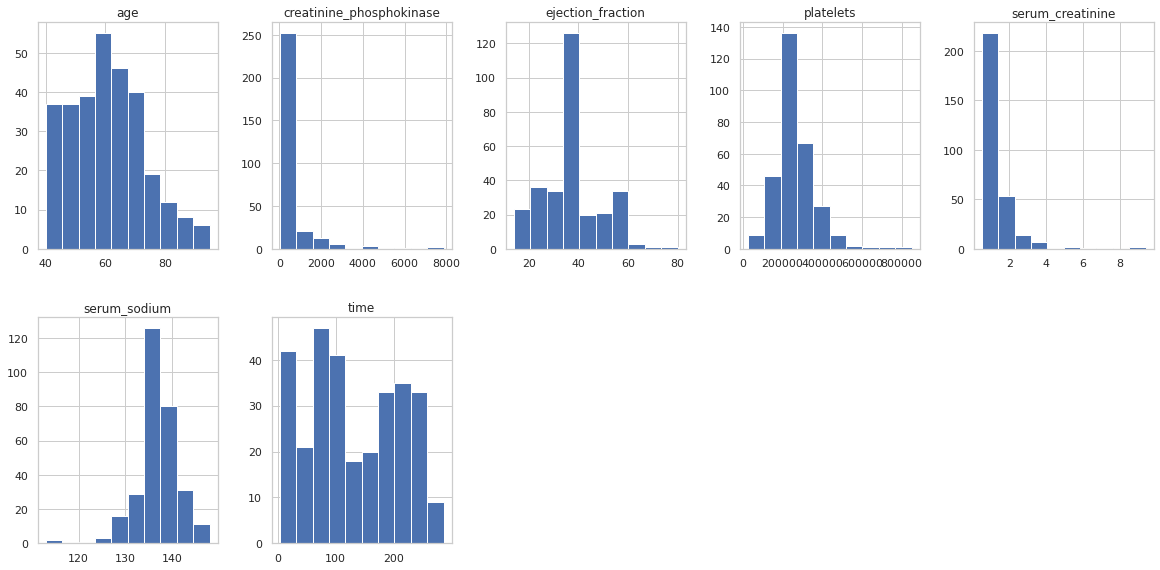

In [56]:
##Histograms of All Numerical Variables of Interest 
num_variables = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
df[num_variables].hist(bins=10, figsize=(20,15), layout=(3,5))

In [57]:
# Distribution of Age

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Histogram(
    x = df['age'],
    xbins=dict( # bins used for histogram
        start=40,
        end=95,
        size=2
    ),
    marker_color='#e8ab60',
    opacity=1
))

fig.update_layout(
    title_text='AGE DISTRIBUTION',
    xaxis_title_text='AGE',
    yaxis_title_text='COUNT', 
    bargap=0.05, # gap between bars of adjacent location coordinates
    xaxis =  {'showgrid': False },
    yaxis = {'showgrid': False },
    template = 'plotly_dark'
)

fig.show()

In [ ]:
# Now lets categorize the above histogram by DEATH_EVENT

import plotly.express as px
fig = px.histogram(df, x="age", color="DEATH_EVENT", marginal="violin", hover_data=df.columns, 
                   title ="Distribution of AGE Vs DEATH_EVENT", 
                   labels={"age": "AGE"},
                   template="plotly_dark",
                   color_discrete_map={"0": "RebeccaPurple", "1": "MediumPurple"}
                  )
fig.show()

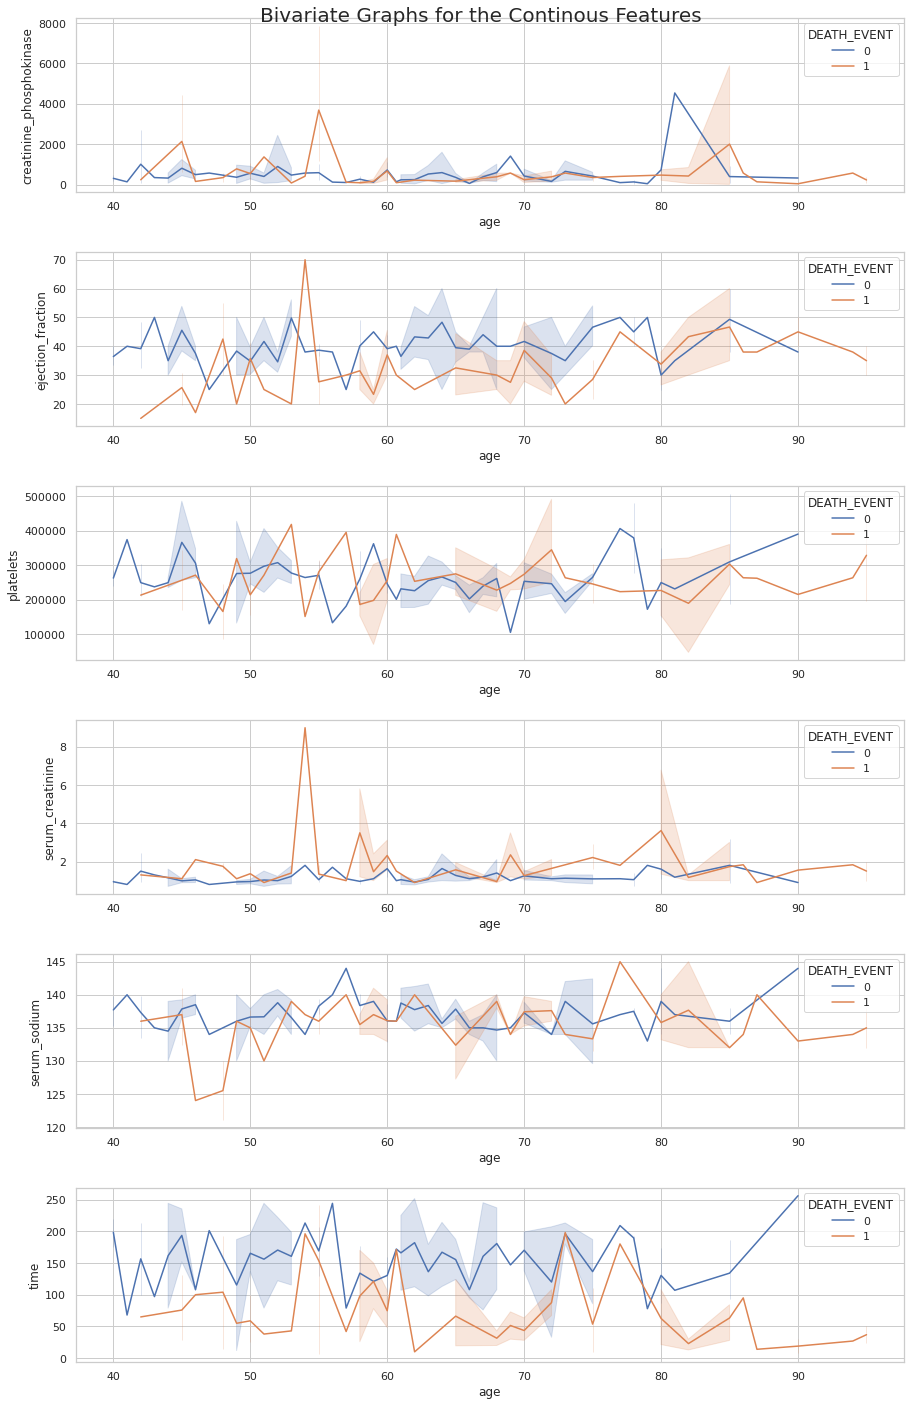

In [12]:
# Dstribution of the continous features based on Bivariate analysis
fig, ax = plt.subplots(6,1,figsize=(13,20))

plt.suptitle('Bivariate Graphs for the Continous Features', fontsize=20)
plt.tight_layout(3)

sns.lineplot(data=df, x='age', y='creatinine_phosphokinase', hue='DEATH_EVENT', ax=ax[0])
sns.lineplot(data=df, x='age', y='ejection_fraction', hue='DEATH_EVENT', ax=ax[1])
sns.lineplot(data=df, x='age', y='platelets', hue='DEATH_EVENT', ax=ax[2])
sns.lineplot(data=df, x='age', y='serum_creatinine', hue='DEATH_EVENT', ax=ax[3])
sns.lineplot(data=df, x='age', y='serum_sodium', hue='DEATH_EVENT', ax=ax[4])
sns.lineplot(data=df, x='age', y='time', hue='DEATH_EVENT', ax=ax[5])

# **Machine Learning Prediction & Outcomes**

**Split Data - Train and Test dataset**

In [64]:
"""Splitting the variables into features and labels. Then it is 
   split into train and test set using train_test_split.
   The split is done in the ratio of 80% for training and 20% for testing"""
#Splitting into y and X variables
y = df.filter(['DEATH_EVENT'])

X = df
X = df.drop(['DEATH_EVENT'], axis=1)

##Splitting data into training (80%) and testing (20%) sets (While keeping balanced)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20, train_size=0.8, random_state=2021, stratify=y)

## **Install Hyperopt-Sklearn**

Here we are going to use the Hyperopt-Sklearn which is an autoML library

In [65]:
#Install Hyperopt-Sklearn
!pip install git+https://github.com/hyperopt/hyperopt-sklearn

  Cloning https://github.com/hyperopt/hyperopt-sklearn to /tmp/pip-req-build-sskv493t
  Running command git clone -q https://github.com/hyperopt/hyperopt-sklearn /tmp/pip-req-build-sskv493t


In [66]:
#Define the estimator
"""HyperoptEstimator is importe from the hpsklearn class and we are also 
   importing any_preprocessing as the preprocessing method and since 
   we are on a classification problem we are using any_classifier as our 
   classifier, which would evaluate to an sklearn style classifier."""
   
from hpsklearn import HyperoptEstimator, any_classifier, any_preprocessing
from hyperopt import tpe
import numpy as np
#Define Hyper-opt parameters
estim = HyperoptEstimator(classifier=any_classifier('my_clf'),
                          preprocessing=any_preprocessing('my_pre'),
                          algo=tpe.suggest,
                          max_evals=100,
                          trial_timeout=120)

In [68]:
#Fitting the estimator
model = estim.fit(X_train, y_train)

  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/hpsklearn/estimator.py:332: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_gb.py:1454: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




  0%|          | 0/1 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().




100%|██████████| 1/1 [00:00<00:00,  1.90it/s, best loss: 0.125]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



In [69]:
#Print the best achived model
""" We specified the hyperopt to use any algorithm and 
    any classifier for our problem. After the execution, we can  see 
    the best performed model and its parameters by using the best_model()."""
Best_Model = estim.best_model()
print(Best_Model)

{'learner': AdaBoostClassifier(algorithm='SAMME', base_estimator=None,
                   learning_rate=0.0023153468590503268, n_estimators=351,
                   random_state=3), 'preprocs': (StandardScaler(copy=True, with_mean=True, with_std=True),), 'ex_preprocs': ()}


# **`Making predictions`**

Here we tested the developed ML model on the test dataset in order to achieve the performance of the model. 

In [100]:
developed_best_model = Best_Model['learner']
y_pred = developed_best_model.predict(X_test)

In [55]:
#Print accuracy of the model on the test data
print(estim.score(X_test, y_test))

0.85


The best model achieved as AdaBoost vlassifier with the following hyperparameters: 

**AdaBoostClassifier**(algorithm='**SAMME**', **base_estimator**=None,
                   **learning_rate**=0.0023153468590503268, **n_estimators**=351,
                   **random_state**=3), '**preprocs**': (StandardScaler(copy=True, with_mean=True, with_std=True))
                   
Using the achieved mode, we got an accuracy score of **85%** for our heart attack prediction in our tets dataset, which is aligned wth two related papers in [3] and [7]. This satisfies our intended goal for the accuracy of the prediction. In reference 7, researchers achived the about ours accuracy and in the refernce [3], researchers got the accuracy in the range of [70%-85%]. This means that our method and approach satisfies with the results in the earlier studies. For future recommendation, we will provide the same assessment for the other ML models as well as using different AUTOML modules that have been presented during the course. In this way, we can get a better sense of the best approach among all of the provided tools. Also, statistical methods can be used in order to highlight the best effective features in heart failure mortality. 






# **Trailer Documentation**

I found this assignment really helpful to be familiar with the application of using Hyperopt-Sklearn in healthcare and health science. I found this module and package very powerful in providing us in finding the best model both for regression and classification tasks. In other words, by using the AutoML libraries, Our job is reduced, So that we can concentrate more on data cleansing and other EDA operations.
Without any detailed preprocessing, the hyperOpt was able to perform well and it obtained an accuracy score of 85% with the best performed model and its parameters. We can improve our model by selecting the features which are mostly correlated to the target. i.e death_event in this case.

Not only the heart failure can be predicted, We can use this program to predict every other diseases that occur as a result of our lifestyle and habbits. In overall, using AutoML brings us the following benenfits for every applications in ML and data analytics:
* It Saves You Time
* It Bridges Skill Gaps
* Improved Scalability
* Increased Productivity
* Reduced Errors in Applying ML Algorithms


# **References:**

[1] Bergstra, J., Komer, B., Eliasmith, C., Yamins, D., & Cox, D. D. (2014). Hyperopt: a Python library for model selection and hyperparameter optimization. Computational Science & Discovery, 8(1), 014008. https://doi.org/10.1088/1749-4699/8/1/014008

[2] López, F. (2021, February 1). HyperOpt: Hyperparameter Tuning based on Bayesian Optimization. Medium. https://towardsdatascience.com/hyperopt-hyperparameter-tuning-based-on-bayesian-optimization-7fa32dffaf29

[3] Chicco, D., & Jurman, G. (2020). Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Medical Informatics and Decision Making, 20(1). https://doi.org/10.1186/s12911-020-1023-5

[4] Tran, D. T., Palfrey, D., & Welsh, R. (2021). The Healthcare Cost Burden in Adults with High Risk for Cardiovascular Disease. PharmacoEconomics - Open, 5(3), 425–435. https://doi.org/10.1007/s41669-021-00257-8

[5] UCI Machine Learning Repository: Heart failure clinical records Data Set. (2017). Heart Failure Clinical Records Data Set. https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records

[6] Drugwatch. (2021, March 15). Congestive Heart Failure | Types, Symptoms, and Treatment. Drugwatch.Com. https://www.drugwatch.com/health/cardiovascular-health/congestive-heart-failure/

[7] Sahoo, P. K., & Jeripothula, P. (2020). Heart Failure Prediction Using Machine Learning Techniques. SSRN Electronic Journal. Published. https://doi.org/10.2139/ssrn.3759562





# **GitHub Link**

https://github.com/aL-333/AutoML-HyperOpt/blob/main/Application_of_HyperOPT_sklearn_in_Health_Science_Group3.ipynb